![logo_universidad](https://bloqueneon.uniandes.edu.co//content/enforced/171175-202310_ISIS3301_02/morado/assets/img/banner.png?_&d2lSessionVal=d1HNZaZihV1jOwJNVtWDIWG7y&ou=171175)

## Laboratorio 1 - Clustering

El objetivo de este notebook es realizar el analisis del caso BiciAlpes, para el cual se tiene un conjunto de datos que contiene información de los accidentes ocurridos involucrando bicicletas en la ciudad de Bogotá. El objetivo es realizar un análisis exploratorio de los datos para identificar patrones y relaciones entre las variables, y así poder responder las preguntas de negocio planteadas. Adicionalmente, se espera usar 3 algoritmos de agrupamiento para identificar grupos de accidentes que se puedan utilizar para responder las preguntas de negocio.

Por medio de 3 iteraciones, se espera que el grupo desarrolle un modelo de agrupamiento que permita responder las preguntas de negocio. En cada iteración se espera que nuestro equipo de trabajo realice los siguientes pasos:

* **Iteración1.** Analisis exploratorio de los datos y creación de un primer modelo de agrupamiento.
* **Iteración2.** Segundo modelo con mejoras a nivel de preparación de datos y configuración de hiper-parámetros
* **Iteración3.** Modelo final que incluye mejoras identificadas al revisar mejor la literatura y la documentación de los algoritmos de agrupamiento.

### Descripción de negocio

BiciAlpes es una organización que presta un servicio de alquiler de bicicletas, solidario y con muchos beneficios para los usuarios. Su objetivo es incentivar planes de movilidad sostenible en zonas urbanas, que contribuyan a reducir la emisión de gases de efecto invernadero que afectan la temperatura del planeta. En el último año, han detectado con preocupación que el uso de la bicicleta se está viendo obstaculizado por la falta de información sobre la seguridad en las vías. Piensa que proporcionar a los ciclistas información sobre las rutas más seguras podría contribuir a aumentar la práctica de esta actividad. Así, decide emprender un estudio para conocer cuáles son los factores que más impactan en los accidentes viales que involucran ciclistas. Este conocimiento, además, podría ayudar a las autoridades y planificadores urbanos en la implementación de mecanismos que reduzcan la ocurrencia de accidentes, así como otros planes de movilidad sostenible. Para realizar este estudio BiciAlpes han recopilado datos, de fuentes abiertas de la Alcaldía, sobre accidentes en los cuales se han visto involucrados ciclistas.

BiciAlpes los ha contactado para realizar este proceso de caracterización e identificación de patrones que puedan ser utilizados para entender los factores que indicen en la severidad de los accidentes, con el fin de trazar mapas de seguridad vial para los ciclistas.  Los datos, al igual que el diccionario de datos, los encuentra disponibles en este directorio: [datos](./datos/Datos_BiciAlpes.csv)

## Referencias

1. [Datos a utilizar: Datos_BiciAlpes.csv](./datos/Datos_BiciAlpes.csv)
2. [Diccionario de datos: Diccionario_BiciAlpes.csv](./datos/Diccionario_BiciAlpes.xlsx)
3. [Documentación de los algoritmos de agrupamiento](https://scikit-learn.org/stable/modules/clustering.html)
4. [Documentación de la librería de visualización de datos](https://seaborn.pydata.org/)
5. [Informacion del negocio](./Laboratorio1_enunciado.md)

## 1. Carga de librerias necesarias

In [114]:
#Se cargan las librerias necesarias para la implementacion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
# Este comando es requerido para que las visualizaciones se muestren en este notebook
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Scipy for aglomerative clustering sch
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

## Exploración y perfilamiento de los datos

## 2. Carga de datos

In [3]:
# Se cargan los datos necesarios para la implementacion
df_accidents = pd.read_csv('./datos/Datos_BiciAlpes.csv', sep=';', encoding = 'latin-1')

In [4]:
# Se muestran las dimensiones del dataframe
df_accidents.shape

(5338, 15)

In [5]:
# Tomamos una muestra aleatoria de los datos para observar su información
df_accidents.sample(5)

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Unnamed: 14
3251,Tarde,1,Día laboral,6,30.0,1,1,1,2,bike,1,0,1,2,NaN
3845,Mañana,1,Día laboral,1,40.0,1,1,1,1,bike,1,1,1,2,NaN
4385,Mañana,1,Fin de semana,9,20.0,1,9,-1,1,bike,2,6,1,3,NaN
1968,Mañana,1,Día laboral,2,30.0,1,1,1,1,bike,1,6,1,2,NaN
1326,Mañana,2,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3,NaN


Se puede observar que existe una columna llamada "Unnamed: 14" la cual cuenta con valores nulos en su totalidad. Esta no representa información relevante para el análisis, por lo que se procede a continuar con el perfilamineto para ver su comportamiento.

## 3. Descripción de los datos

In [6]:
# Se muestran los tipos de datos de cada columna
df_accidents.dtypes

Time                                            object
Number_of_Casualties                             int64
Day_of_Week                                     object
Road_Type                                        int64
Speed_limit                                    float64
Light_Conditions                                 int64
Weather_Conditions                               int64
Road_Surface_Conditions                          int64
Urban_or_Rural_Area                              int64
Vehicle_Type                                    object
Did_Police_Officer_Attend_Scene_of_Accident      int64
Junction_Detail                                  int64
Number_of_Vehicles                               int64
Accident_Severity                                int64
Unnamed: 14                                    float64
dtype: object

In [7]:
# Se revisa la informacion del dataframe
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Time                                         5338 non-null   object 
 1   Number_of_Casualties                         5338 non-null   int64  
 2   Day_of_Week                                  5319 non-null   object 
 3   Road_Type                                    5338 non-null   int64  
 4   Speed_limit                                  5338 non-null   float64
 5   Light_Conditions                             5338 non-null   int64  
 6   Weather_Conditions                           5338 non-null   int64  
 7   Road_Surface_Conditions                      5338 non-null   int64  
 8   Urban_or_Rural_Area                          5338 non-null   int64  
 9   Vehicle_Type                                 5338 non-null   object 
 10  

### 3.1 Información de las variables númericas

In [8]:
# Extraemos las variables númericas mencionadas en el diccionario
df_accidents_numeric = df_accidents[['Number_of_Casualties', 'Speed_limit', 'Number_of_Vehicles']]

# Describimos las variables númericas
df_accidents_numeric.describe()

,Number_of_Casualties,Speed_limit,Number_of_Vehicles
count,5338.000000,5338.000000,5338.000000
mean,1.118022,33.522855,1.001124
std,0.330694,10.206576,0.033511
min,1.000000,15.000000,1.000000
25%,1.000000,30.000000,1.000000
50%,1.000000,30.000000,1.000000
75%,1.000000,30.000000,1.000000
max,4.000000,70.000000,2.000000


Para los resultados de las variables numericas que tenemos, se tiene la siguiente información:

* Para todas existe un numero de accidentes de 5338, lo cual es correcto ya que es el total de accidentes que tenemos en el dataset.

### Number_of_Casualties

* Para esta variable se tiene que el valor minimo es 1 y máximo es 4, lo cual nos indica que para cada accidente se tiene un numero de personas involucradas que va desde 1 hasta 4.

* El valor promedio es de 1.12 lo cual nos indica que en promedio para cada accidente se tiene una persona involucrada.

* En cuanto a los porcentajes de los datos, tenemos que para el 25%, 50% y 75% de los datos se tiene que el numero de personas involucradas es 1, lo cual nos indica que la mayoria de los accidentes se tiene una sola persona involucrada. Adicionalmente, esto nos indica que el caso que se muestra como maximo se encuentra fuera del 75% de los datos.

### Speed_limit

* Para esta variable se tiene que el valor minimo es 15 y máximo es 70, lo cual nos indica que para cada accidente se tiene un limite de velocidad que va desde 15 hasta 70.

* El valor promedio es de 33.52 lo cual nos indica que en promedio para cada accidente se tiene un limite de velocidad de 32.52.

* En cuanto a los porcentajes de los datos, tenemos que para el 25%, 50% y 75% de los datos se tiene que el limite de velocidad es 30, lo cual nos indica que la mayoria de los accidentes se tiene un limite de velocidad de 30. Adicionalmente, esto nos indica que el caso que se muestra como maximo se encuentra fuera del 75% de los datos.

### Number_of_Vehicles

* Para esta variable se tiene que el valor minimo es 1 y máximo es 2, lo cual nos indica que para cada accidente se tiene un numero de vehiculos involucrados que va desde 1 hasta 2.

* El valor promedio es de 1.001 lo cual nos indica que en promedio para cada accidente se tiene un numero de vehiculos involucrados de 1.001.

* En cuanto a los porcentajes de los datos, tenemos que para el 25%, 50% y 75% de los datos se tiene que el numero de vehiculos involucrados es 1, lo cual nos indica que la mayoria de los accidentes se tiene un solo vehiculo involucrado. Adicionalmente, esto nos indica que el caso que se muestra como maximo se encuentra fuera del 75% de los datos.

Teniendo en cuenta la información anterior, es posible encontrar una relación entre el numero de involucrados y el numero de vehiculos para asi poder determinar si es posible agrupar los datos en base a esta relación.

In [9]:
# Se encuentra la relacion entre las variables númericas (Number_of_Casualties y Number_of_Vehicles)
df_accidents["CasualtiesbyVehicle"] = df_accidents["Number_of_Casualties"]/df_accidents["Number_of_Vehicles"]

In [10]:
df_accidents["CasualtiesbyVehicle"].describe()

count    5338.000000
mean        1.116898
std         0.329391
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: CasualtiesbyVehicle, dtype: float64

En base a esta información, tenemos que la media de accidentes por numero de vehiculo es 1.117 lo cual nos indica que en promedio para cada vehiculo involucrado se tiene un accidente. Adicionalmente, se puede asumir haciendo el analisis adecuado que en cada accidente el involucrado es el ciclista y el vehiculo es el perpertrador del accidente.

In [11]:
df_accidents[df_accidents["CasualtiesbyVehicle"] == 4]

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Unnamed: 14,CasualtiesbyVehicle
248,Tarde,4,Fin de semana,6,30.0,1,2,2,1,bike,1,3,1,3,NaN,4.0
4087,Mañana,4,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3,NaN,4.0


### 3.2 Información de las variables categóricas

In [12]:
# Extraemos las variables númericas mencionadas en el diccionario
df_accidents_categorica = df_accidents[['Accident_Severity', 'Day_of_Week', 'Road_Type', 'Junction_Detail', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Vehicle_Type', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Time']]

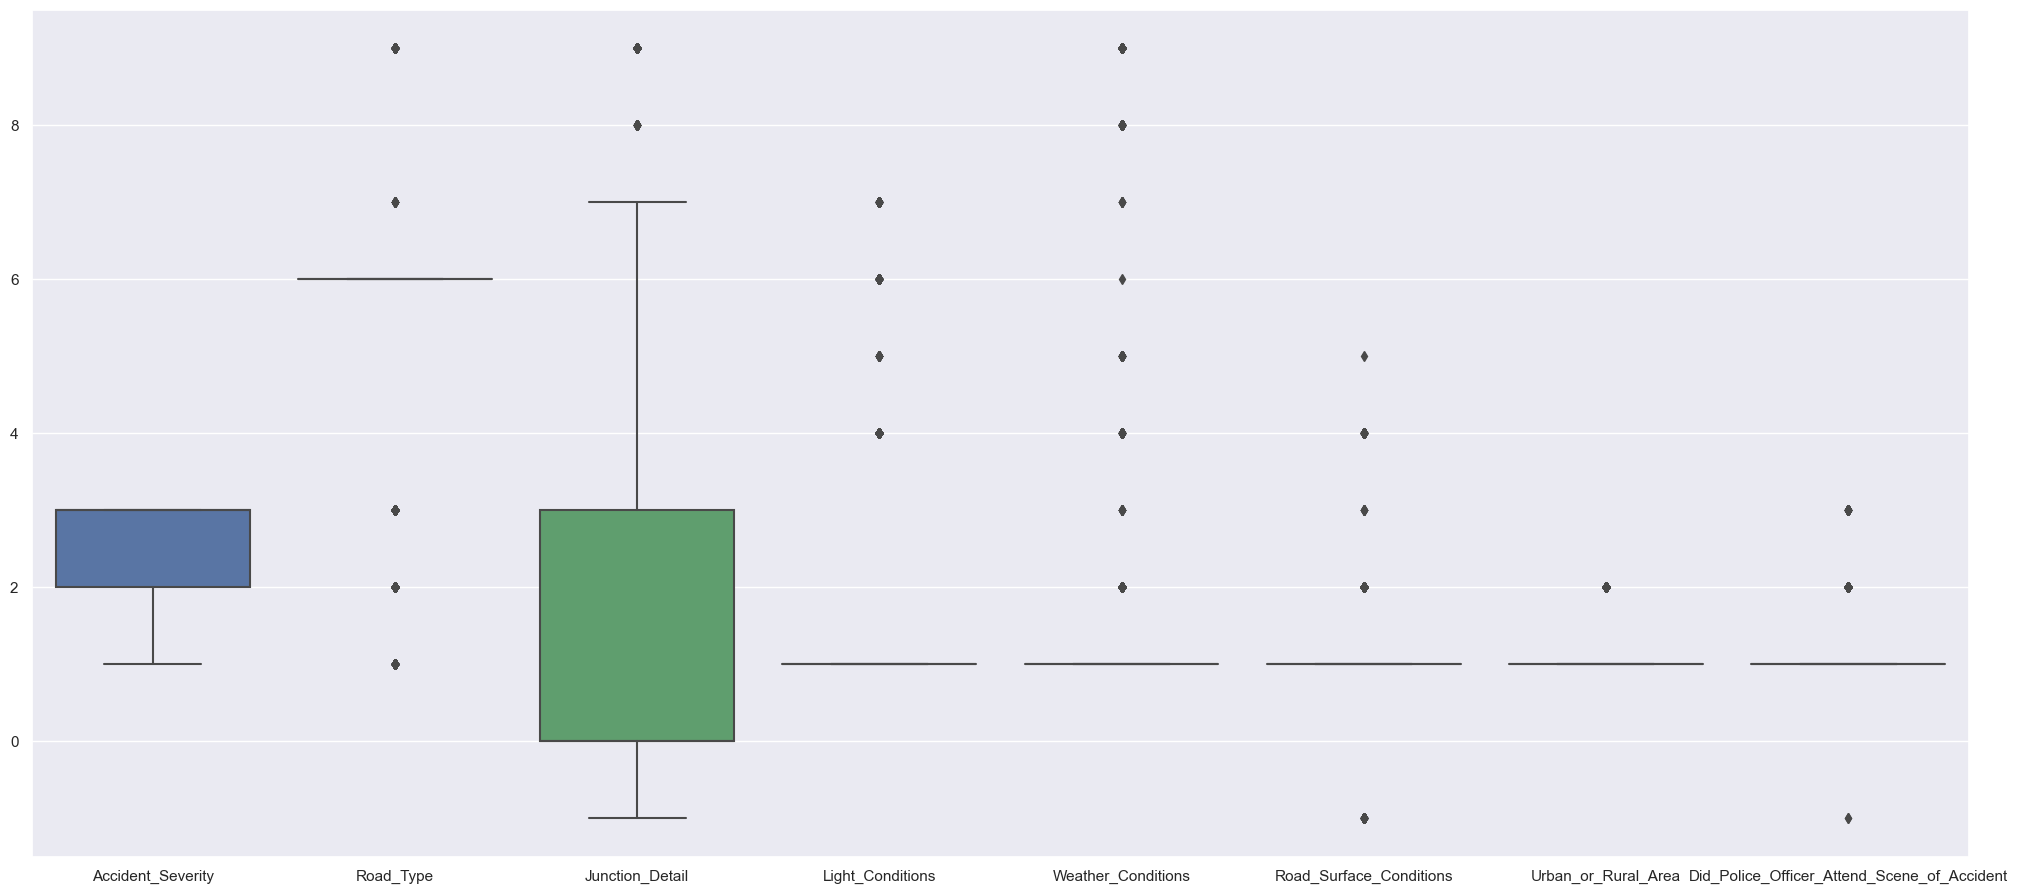

In [13]:
# Realizamos un diagrama de cajas para las variables categoricas
categorical_variables = ['Accident_Severity', 'Day_of_Week', 'Road_Type', 'Junction_Detail', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Vehicle_Type', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Time']

fig = plt.figure(figsize=(25, 11))
ax = sns.boxplot(data=df_accidents_categorica[categorical_variables], orient="v")

In [14]:
# Describimos la variable categorica Accident_Severity
df_accidents_categorica['Accident_Severity'].value_counts()

3    3462
2    1781
1      95
Name: Accident_Severity, dtype: int64

De la severidad de los accidentes, se puede decir que la mayoria de los accidentes son leves, seguido de los accidentes serios y los accidentes mortales.

In [15]:
# Describimos las variable categorica Day_of_Week
df_accidents_categorica['Day_of_Week'].value_counts()

Día laboral      3832
Fin de semana    1487
Name: Day_of_Week, dtype: int64

De los accidentes podemos decir que la mayoria ocurren en un dia laboral y el resto los fines de semana.

In [16]:
# Describimos las variable categorica Road_Type
df_accidents_categorica['Road_Type'].value_counts()

6    4475
3     312
2     253
9     141
1     139
7      18
Name: Road_Type, dtype: int64

De los tipos de carretera tenemos que la mayoría de accidentes ocurren en carreteras con calzada seguido de carreteras autovia, carreteras de un solo sentido, de origen desconocido, rotondas y circunvalación.

In [17]:
# Describimos las variable categorica Junction_Detail
df_accidents_categorica['Junction_Detail'].value_counts()

 0    2763
 3    1555
 6     468
 1     199
 9     171
 7      68
 8      43
 2      34
-1      25
 5      12
Name: Junction_Detail, dtype: int64

En cuanto a las caracteristicas del cruce, tenemos que se presentaron mas accidentes donde no habían cruces y menos donde se contaba con una carretera de acceso.

In [18]:
# Describimos las variable categorica Light_Conditions
df_accidents_categorica['Light_Conditions'].value_counts()

1    4231
4     891
6     122
7      73
5      21
Name: Light_Conditions, dtype: int64

En cuanto a las condiciones de iluminación, la mayor cantidad de accidentes se presentó durante el día, y la menor cantidad con iluminación desconocida.

In [19]:
# Describimos las variable categorica Weather_Conditions
df_accidents_categorica['Weather_Conditions'].value_counts()

1    4621
2     321
9     191
8      80
4      59
5      46
3      12
7       7
6       1
Name: Weather_Conditions, dtype: int64

En cuanto a las condiciones climaticas, la cantidad de accidentes es mayor cuando este presenta un buen clima y vientos suaves y menor cuando el clima presenta nieve. 

In [20]:
# Describimos las variable categorica Road_Surface_Conditions
df_accidents_categorica['Road_Surface_Conditions'].value_counts()


 1    4260
 2     901
 4      87
-1      81
 3       8
 5       1
Name: Road_Surface_Conditions, dtype: int64

En cuanto a las condiciones de la superficie de la carretera, la mayor cantidad de accidentes se presentó en carreteras secas y la menor cantidad en carreteras inundadas.

In [21]:
# Describimos las variable categorica Urban_or_Rural_Area
df_accidents_categorica['Urban_or_Rural_Area'].value_counts()

1    4040
2    1298
Name: Urban_or_Rural_Area, dtype: int64

La mayor cantidad de accidentes se presentó en carreteras urbanas mientras que la menor cantidad se presentó en carreteras rurales.

In [22]:
# Describimos las variable categorica Vehicle_Type
df_accidents_categorica['Vehicle_Type'].value_counts()

bike    5338
Name: Vehicle_Type, dtype: int64

En cuanto al tipo de vehiculo, todos los accidentes se presentaron con bicicletas.

In [23]:
# Describimos las variable categorica Did_Police_Officer_Attend_Scene_of_Accident
df_accidents_categorica['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

 1    4059
 2    1231
 3      46
-1       2
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

En cuanto a si un oficial de policia asisitio al accidente, la mayoria de los accidentes si contaron con la asistencia de un oficial de policia, mientras que la menor cantidad no contó con el reporte de un oficial de policia.

In [24]:
# Describimos la variable categorica Time
df_accidents_categorica['Time'].value_counts()

Tarde        2171
Mañana       1684
Noche        1477
Madrugada       6
Name: Time, dtype: int64

Por último, en cuanto al tiempo en el que ocurrio el accidente, la mayoria de los accidentes se presentaron en las horas de la tarde, seguido de la mañana, la noche y la madrugada.

## 4. Perfilamiento de los datos

En base a la información anterior tenemos que:
* Tenemos una columna con valores nulos, la cual revisaremos si aporta al analisis
* Nuestra columna Day_of_Week tiene valores nulos, por lo que procederemos a evaluar

Con esto, ahora vamos a realizar el perfilamiento de los datos para así preparar todo correctamente para el análisis.

In [25]:
# Importamos "profilling" de pandas para obtener un reporte de los datos
%pip install pandas-profiling --upgrade

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas_profiling

C:\Users\dania\AppData\Local\Temp\ipykernel_8300\1591302161.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [27]:
# Generamos el reporte de los datos
profile = pandas_profiling.ProfileReport(df_accidents)

In [28]:
df_accidents

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Unnamed: 14,CasualtiesbyVehicle
0,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3,NaN,1.0
1,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,0,1,3,NaN,1.0
2,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,3,1,3,NaN,1.0
3,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,2,NaN,2.0
4,Mañana,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,Tarde,1,Día laboral,6,20.0,1,1,2,1,bike,1,9,1,3,NaN,1.0
5334,Noche,2,Día laboral,6,30.0,1,1,1,2,bike,2,0,1,2,NaN,2.0
5335,Tarde,1,Día laboral,6,30.0,4,5,2,1,bike,2,3,1,2,NaN,1.0
5336,Noche,1,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3,NaN,1.0


In [29]:
# Mostramos el reporte realizado por pandas
profile

## 4.1 Calidad y preparación de los datos

LLegados a este punto vamos a analizar la calidad de los datos teniendo en cuenta los aspectos relevantes para el análisis. En los resultados dados anteriormente, se puede observar que los datos no se encuentran en el estado ideal para el analisis, por lo cual procedemos a realizar la limpieza de los datos.

### 4.1.1 Completitud

Teniendo en cuenta que contamos con valores nulos en el dataset y el contexto del negocio, se procede a realizar la limpieza y el estudio de los problemas presentes en los datos.

In [30]:
# Calculamos el porcentaje de valores nulos por columna
((df_accidents.isnull().sum()/df_accidents.shape[0])).sort_values(ascending=False)

Unnamed: 14                                    1.000000
Day_of_Week                                    0.003559
Time                                           0.000000
Number_of_Casualties                           0.000000
Road_Type                                      0.000000
Speed_limit                                    0.000000
Light_Conditions                               0.000000
Weather_Conditions                             0.000000
Road_Surface_Conditions                        0.000000
Urban_or_Rural_Area                            0.000000
Vehicle_Type                                   0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000000
Junction_Detail                                0.000000
Number_of_Vehicles                             0.000000
Accident_Severity                              0.000000
CasualtiesbyVehicle                            0.000000
dtype: float64

Luego de esto, podemos observar que contamos con una columna llamada "Unnamed: 14" la cual no cuenta con ningun dato relevante ya que todas sus entradas son nulas, por lo cual procedemos a eliminarla.

Adicionalmente, se puede observar que la columna Day_of_Week cuenta con un porcentaje del 0.0035559 de datos nulos, en base a esto podriamos darle un comportamiento de "desconocido" para el analisis.

In [31]:
# Se eliminan las columnas que no se van a utilizar
df_accidents = df_accidents.drop(columns = 'Unnamed: 14')

In [32]:
# Reemplazamos los datos nulos por "desconocido (unknown)"
df_accidents['Day_of_Week'].fillna('Desconocido', inplace=True)

Volvemos a realizar el analisis de los datos para ver si se presentan cambios en los datos.

In [33]:
# Volvemos a calcular el porcentaje de valores nulos por columna
((df_accidents.isnull().sum()/df_accidents.shape[0])).sort_values(ascending=False)

Time                                           0.0
Number_of_Casualties                           0.0
Day_of_Week                                    0.0
Road_Type                                      0.0
Speed_limit                                    0.0
Light_Conditions                               0.0
Weather_Conditions                             0.0
Road_Surface_Conditions                        0.0
Urban_or_Rural_Area                            0.0
Vehicle_Type                                   0.0
Did_Police_Officer_Attend_Scene_of_Accident    0.0
Junction_Detail                                0.0
Number_of_Vehicles                             0.0
Accident_Severity                              0.0
CasualtiesbyVehicle                            0.0
dtype: float64

In [34]:
df_accidents

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,CasualtiesbyVehicle
0,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3,1.0
1,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,0,1,3,1.0
2,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,3,1,3,1.0
3,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,2,2.0
4,Mañana,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,Tarde,1,Día laboral,6,20.0,1,1,2,1,bike,1,9,1,3,1.0
5334,Noche,2,Día laboral,6,30.0,1,1,1,2,bike,2,0,1,2,2.0
5335,Tarde,1,Día laboral,6,30.0,4,5,2,1,bike,2,3,1,2,1.0
5336,Noche,1,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3,1.0


### 4.1.2 Unicidad/Duplicidad

En cuanto a la unicidad y duplicidad de los datos, podemos observar que no se presentan problemas en este aspecto debido a que aunque se presenten datos duplicados estos no afectan el analisis. Son necesario ya que los datos estan repetidos pero no cuentan con un indicador que nos permita identificarlos como duplicados, todos son importantes para el analisis.

### 4.1.3 Consistencia

La mayoria de las variables categoricas se encuentran en formato numerico aunque estas representan cosas diferentes. Por ejemplo, Urban_or_Rural, 1 representa urbano y 2 representa rural. Dado esto, no se presentan problemas de consistencia en los datos. Adicionalmente, aunque Day_of_Week se encuentra en formato de texto, este no presenta problemas de consistencia como se ve a continuación.

In [35]:
df_accidents['Day_of_Week'].unique()

array(['Día laboral', 'Fin de semana', 'Desconocido'], dtype=object)

### 4.1.4 Validez

Dado a que no contamos con un dominio del negocio, no podemos asegurar que los datos esten validos, por lo cual se procede a realizar el analisis de los datos para ver si se presentan problemas de validez.

En cuanto a las variables categoricas si tenemos un rango de estas y podemos asegurar que los datos estan validos. Procedemos a realizar el analisis de los datos para ver si se presentan problemas de validez.

In [36]:
df_accidents['Day_of_Week'].unique()

array(['Día laboral', 'Fin de semana', 'Desconocido'], dtype=object)

In [37]:
df_accidents['Junction_Detail'].unique()

array([ 3,  0,  6,  1,  7,  9,  8,  2,  5, -1], dtype=int64)

In [38]:
df_accidents['Light_Conditions'].unique()

array([1, 4, 6, 7, 5], dtype=int64)

In [39]:
df_accidents['Weather_Conditions'].unique()

array([1, 9, 2, 4, 8, 5, 3, 7, 6], dtype=int64)

In [40]:
df_accidents['Road_Surface_Conditions'].unique()

array([ 1,  2, -1,  5,  4,  3], dtype=int64)

In [41]:
df_accidents['Urban_or_Rural_Area'].unique()

array([1, 2], dtype=int64)

In [42]:
df_accidents['Vehicle_Type'].unique()

array(['bike'], dtype=object)

In [43]:
df_accidents['Did_Police_Officer_Attend_Scene_of_Accident'].unique()

array([ 1,  2,  3, -1], dtype=int64)

In [44]:
df_accidents['Time'].unique()

array(['Mañana', 'Tarde', 'Noche', 'Madrugada'], dtype=object)

Como pudo ser observado en el analisis de los datos, no se presentan problemas de validez en los datos.

## 5. Modelaje de los datos

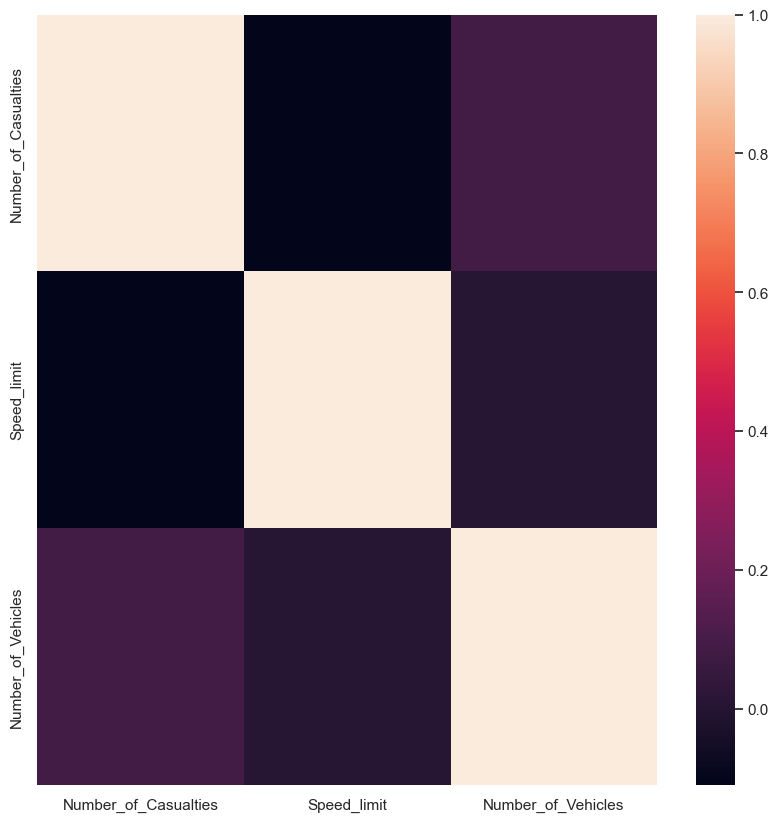

In [45]:
## Se hacen los mapas de calor para ver la correlacion entre las variables numericas
# Se crea una matriz de correlación
corr = df_accidents_numeric.corr()

plt.figure(figsize=(10,10))

sns.heatmap(corr)

# Se muestra el mapa de calor
plt.show()

Ya con esto podemos tener una idea de los datos que tenemos y como se comportan, por lo cual procedemos a realizar el modelaje de los datos.

In [46]:
name_cols_number = ['Number_of_Casualties','Number_of_Vehicles']
name_cols_number2 = ['Number_of_Casualties', 'Speed_limit']
name_cols_number3 = ['Number_of_Vehicles', 'Speed_limit']

In [47]:
df_accidents_prep = df_accidents[name_cols_number]
df_accidents_prep2 = df_accidents[name_cols_number2]
df_accidents_prep3 = df_accidents[name_cols_number3]

### Realizamos k-means con las variables numericas para analizar su comportamiento

Tenemos en cuenta el metodo del codo para todas las variables numericas para determinar el numero de clusters que se deben utilizar.

In [48]:
mms = MinMaxScaler()

df_accidents_prep_norm = mms.fit_transform(df_accidents_prep.copy())
saved_cols = df_accidents_prep.columns

df_accidents_prep_norm2 = mms.fit_transform(df_accidents_prep2.copy())
saved_cols2 = df_accidents_prep2.columns

df_accidents_prep_norm3 = mms.fit_transform(df_accidents_prep3.copy())
saved_cols3 = df_accidents_prep3.columns

df_accidents_prep_norm = pd.DataFrame(df_accidents_prep_norm, columns =saved_cols)
df_accidents_prep_norm2 = pd.DataFrame(df_accidents_prep_norm2, columns =saved_cols2)
df_accidents_prep_norm3 = pd.DataFrame(df_accidents_prep_norm3, columns =saved_cols3)

In [49]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

C:\Users\dania\AppData\Local\Temp\ipykernel_8300\237601035.py:32: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  km.fit(data)
C:\Users\dania\AppData\Local\Temp\ipykernel_8300\237601035.py:32: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  km.fit(data)
C:\Users\dania\AppData\Local\Temp\ipykernel_8300\237601035.py:32: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  km.fit(data)
C:\Users\dania\AppData\Local\Temp\ipykernel_8300\237601035.py:32: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  km.fit(data)
C:\Users\dania\AppData\Local\Temp\ipykernel_8300\237601035.py:32: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to du

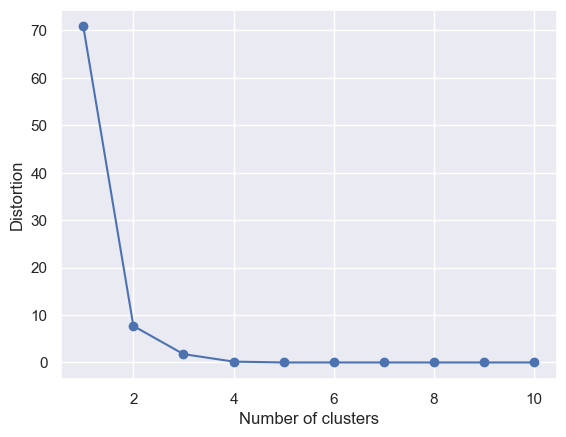

In [50]:
plot_distortion(df_accidents_prep_norm)

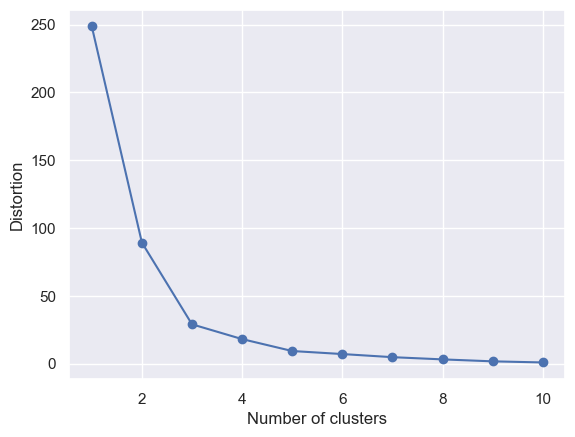

In [51]:
plot_distortion(df_accidents_prep_norm2)

C:\Users\dania\AppData\Local\Temp\ipykernel_8300\237601035.py:32: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  km.fit(data)


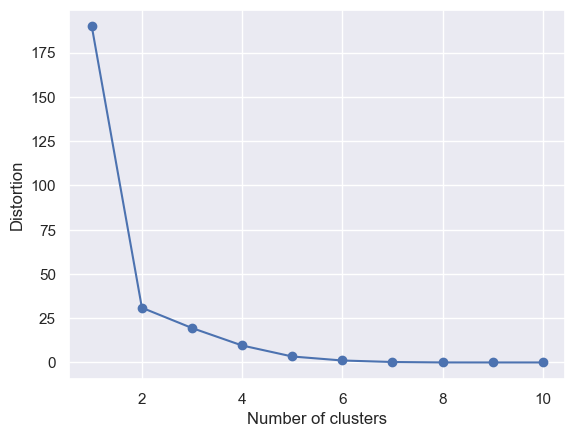

In [52]:
plot_distortion(df_accidents_prep_norm3)

### Podemos concluir que para las combinaciones de variables numericas que tendremos en cuenta, el numero de clusters apropiados teniendo en cuenta la ley del codo, son 2.

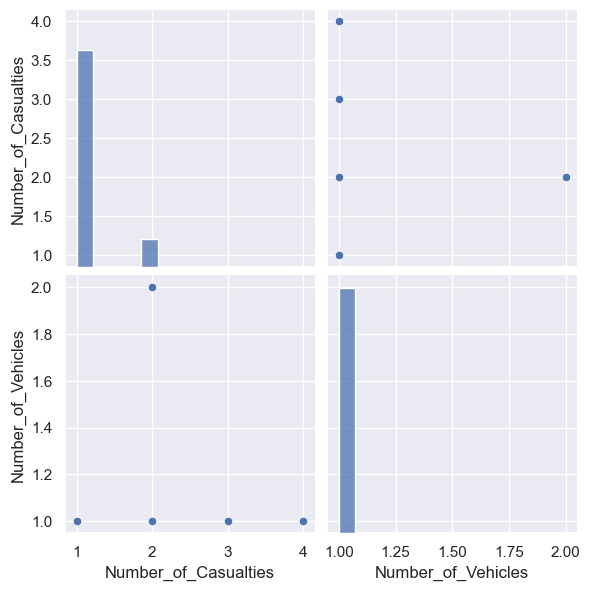

In [53]:
sns.pairplot(df_accidents_prep.dropna(), height=3,vars=['Number_of_Casualties','Number_of_Vehicles'],kind='scatter')

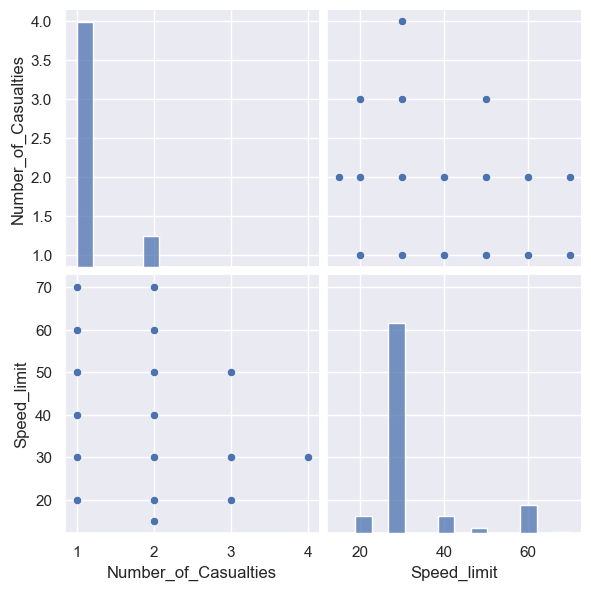

In [54]:
sns.pairplot(df_accidents_prep2.dropna(), height=3,vars=['Number_of_Casualties','Speed_limit'],kind='scatter')

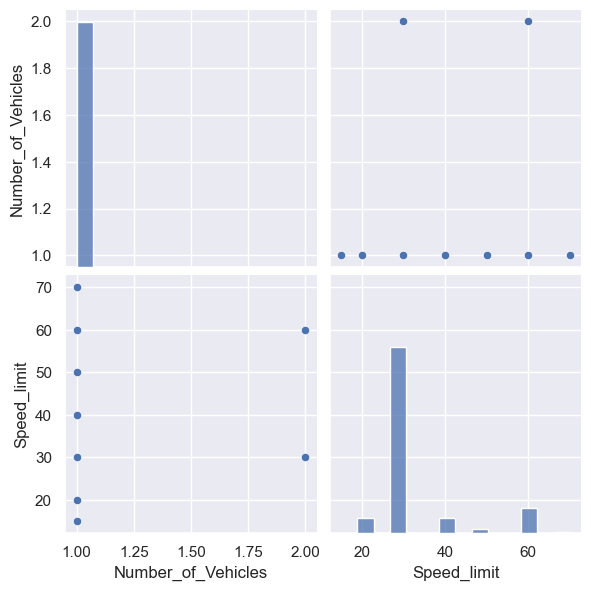

In [55]:
sns.pairplot(df_accidents_prep3.dropna(), height=3,vars=['Number_of_Vehicles','Speed_limit'],kind='scatter')

In [56]:
# Realizamos k-means con 2 clusters para todos los casos
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans = kmeans.fit(df_accidents_prep)
kmeans2 = KMeans(n_clusters=2, random_state=0)
kmeans2 = kmeans2.fit(df_accidents_prep2)
kmeans3 = KMeans(n_clusters=2, random_state=0)
kmeans3 = kmeans3.fit(df_accidents_prep3)

In [57]:
#Transformar arreglo el dataframe que trabajamos para aplicar funciones más adelante.
cols_number = df_accidents_prep.to_numpy()
cols_number


array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int64)

In [58]:
cols_number2 = df_accidents_prep2.to_numpy()
cols_number2

array([[ 1., 30.],
       [ 1., 30.],
       [ 1., 30.],
       ...,
       [ 1., 30.],
       [ 1., 30.],
       [ 1., 70.]])

In [59]:
cols_number3 = df_accidents_prep3.to_numpy()
cols_number3

array([[ 1., 30.],
       [ 1., 30.],
       [ 1., 30.],
       ...,
       [ 1., 30.],
       [ 1., 30.],
       [ 1., 70.]])

In [60]:
#Consultar el los labels del clúster asignado a cada fila 
kmeans.labels_
kmeans2.labels_
kmeans3.labels_

array([1, 1, 1, ..., 1, 1, 0])

C:\Users\dania\AppData\Local\Temp\ipykernel_8300\628254449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents_prep['Cluster'] = labels


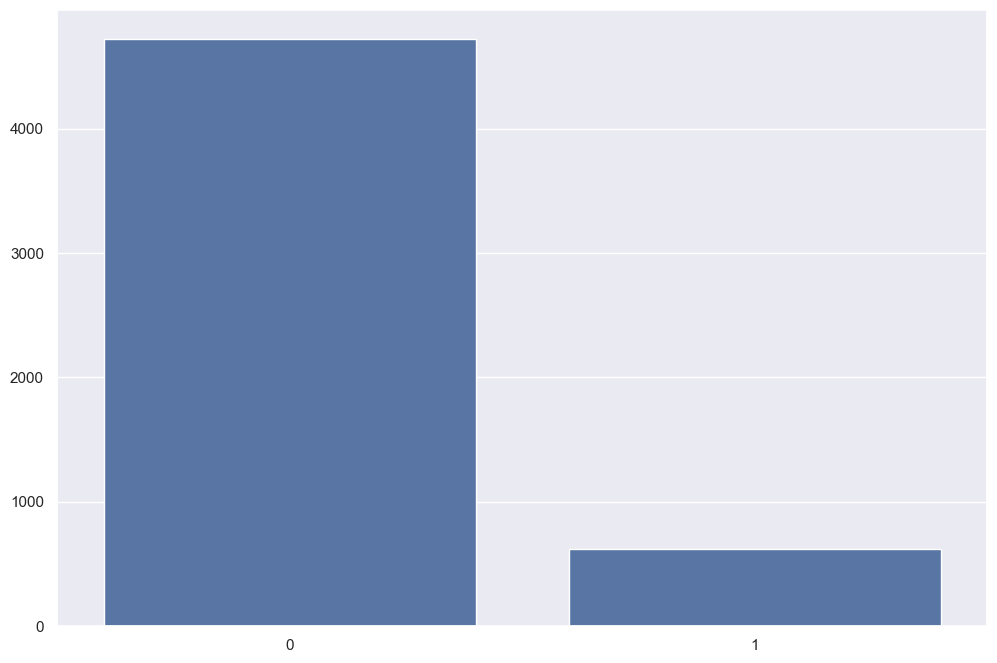

In [61]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
df_accidents_prep['Cluster'] = labels

cluster_distrib = df_accidents_prep['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

C:\Users\dania\AppData\Local\Temp\ipykernel_8300\2162937242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents_prep2['Cluster'] = labels2


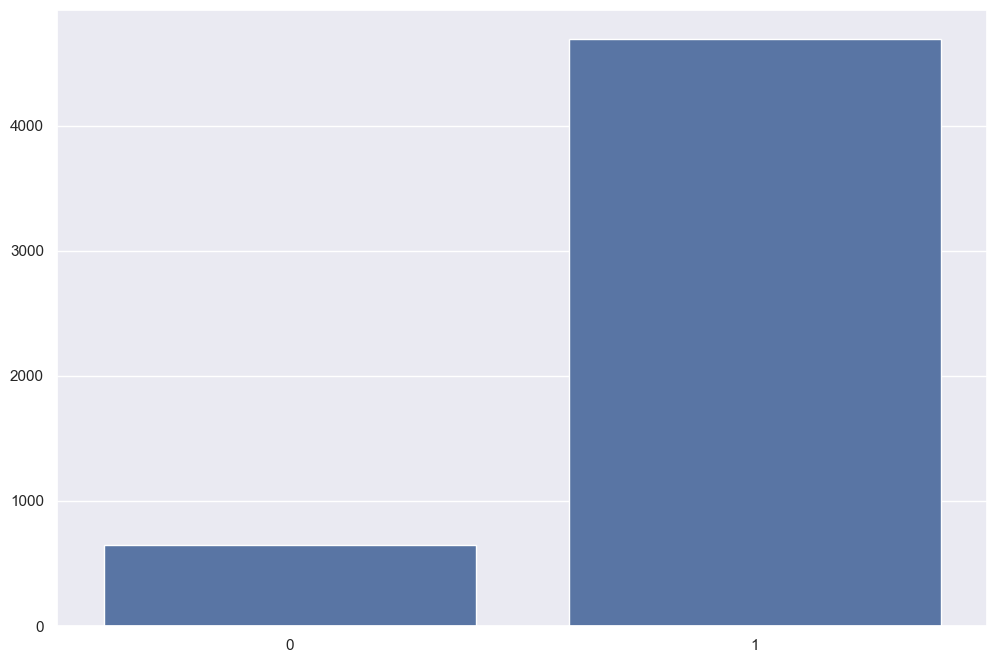

In [62]:
# Revisar la cantidad de registros en los clústeres resultado
labels2 = kmeans2.labels_
df_accidents_prep2['Cluster'] = labels2

cluster_distrib2 = df_accidents_prep2['Cluster'].value_counts()

fig2=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib2.index, y=cluster_distrib2.values, color='b');

C:\Users\dania\AppData\Local\Temp\ipykernel_8300\3447079962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents_prep3['Cluster'] = labels3


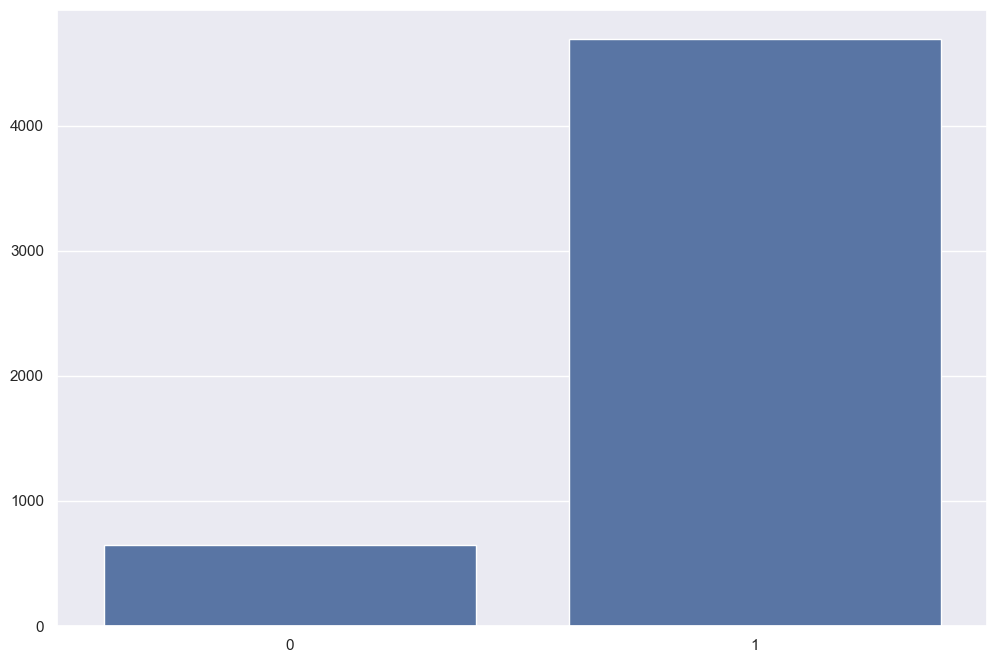

In [63]:
# Revisar la cantidad de registros en los clústeres resultado
labels3 = kmeans3.labels_
df_accidents_prep3['Cluster'] = labels3

cluster_distrib3 = df_accidents_prep3['Cluster'].value_counts()

fig3=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib3.index, y=cluster_distrib3.values, color='b');

In [64]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_accidents_prep.groupby('Cluster').count()

,Number_of_Casualties,Number_of_Vehicles
Cluster,,
0,4720,4720
1,618,618


In [65]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_accidents_prep2.groupby('Cluster').count()

,Number_of_Casualties,Speed_limit
Cluster,,
0,647,647
1,4691,4691


In [66]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_accidents_prep3.groupby('Cluster').count()

,Number_of_Vehicles,Speed_limit
Cluster,,
0,647,647
1,4691,4691


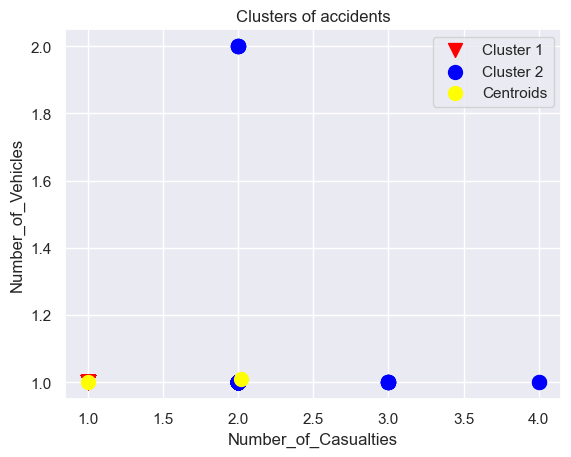

In [67]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number[kmeans.labels_ == 0, 0], cols_number[kmeans.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans.labels_ == 1, 0], cols_number[kmeans.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of accidents')
plt.xlabel(name_cols_number[0])
plt.ylabel(name_cols_number[1])
plt.legend()
plt.show()

### Observaciones
La principal diferencia que se puede ver en los clusters es la varianza que se tiene con los datos. Los datos del cluster 1 están más cercanos del centroide, lo que quiere decir que hay una tendencia en los accidentes sobre estos datos. Por el contrario al cluster 2 tiene datos más alejados del centroide, ya que  sus datos están repartidos entré más valores de vehículos y víctimas.

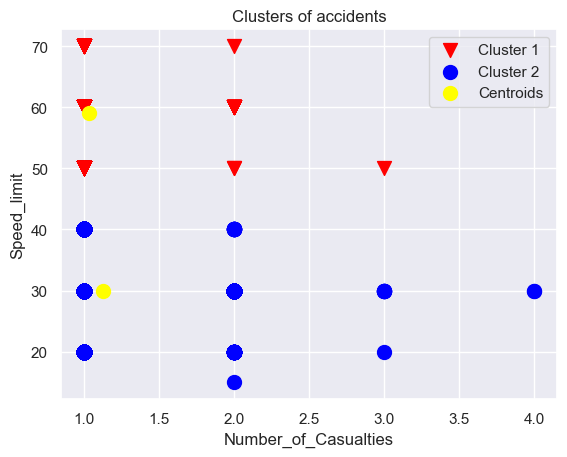

In [68]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number2[kmeans2.labels_ == 0, 0], cols_number2[kmeans2.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number2[kmeans2.labels_ == 1, 0], cols_number2[kmeans2.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of accidents')
plt.xlabel(name_cols_number2[0])
plt.ylabel(name_cols_number2[1])
plt.legend()
plt.show()

### Observaciones
En esta segunda gráfica de clustering se evidencia dos grupos significativos definidos en gran medido por la variable "speed_limit". Sin embargo, se nota una similitud con los dos grupos, ya que hay una tendencia a un numero de víctimas igual a uno.

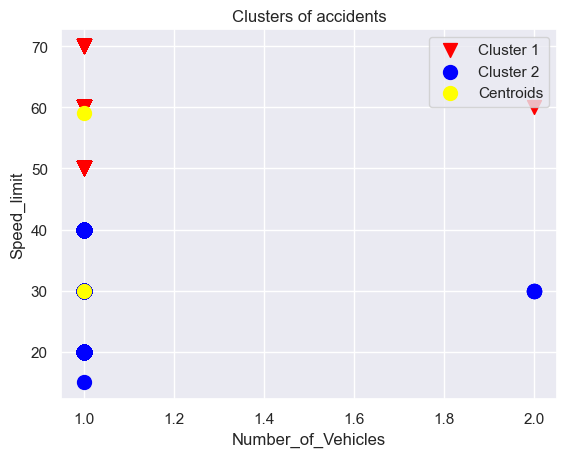

In [69]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number3[kmeans3.labels_ == 0, 0], cols_number3[kmeans3.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number3[kmeans3.labels_ == 1, 0], cols_number3[kmeans3.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of accidents')
plt.xlabel(name_cols_number3[0])
plt.ylabel(name_cols_number3[1])
plt.legend()
plt.show()

### Observaciones
En esta última gráfica se puede ver un comportamiento similar al anterior con centroides definidos por la variable "speed_limit" con valores cercanos a 30 y 60 y una tendencia al número de víctimas con valores de 1 en la mayoría de datos.

In [70]:
# Ahora hacemos un dataframe con la informacion de todos los clusters

df_clusters = pd.DataFrame(columns=['Variables','Cluster 1','Cluster 2'])
df_clusters['Variables'] = ['Number_of_Casualties vs Number_of_Vehicles','Number_of_Vehicles vs Speed_limit','Number_of_Casualties vs Speed_limit']
df_clusters['Cluster 1'] = [cluster_distrib[0],cluster_distrib2[0],cluster_distrib3[0]]
df_clusters['Cluster 2'] = [cluster_distrib[1],cluster_distrib2[1],cluster_distrib3[1]]
df_clusters


,Variables,Cluster 1,Cluster 2
0,Number_of_Casualties vs Number_of_Vehicles,4720,618
1,Number_of_Vehicles vs Speed_limit,647,4691
2,Number_of_Casualties vs Speed_limit,647,4691


### 

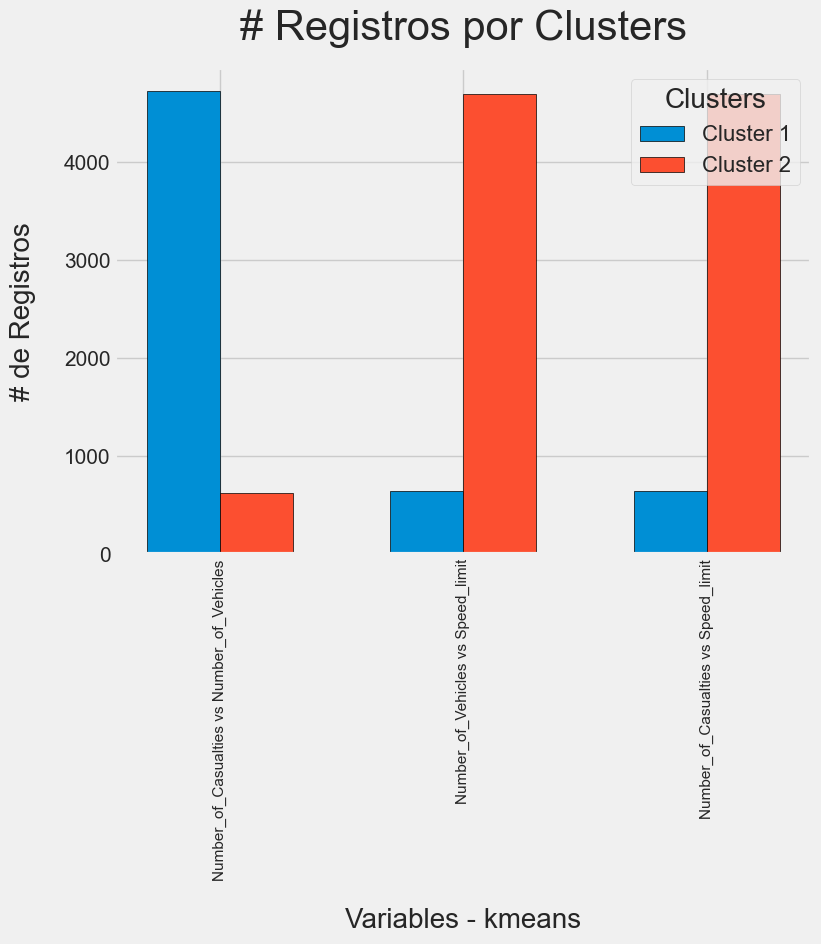

In [71]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1, figsize = (8,6))

label = df_clusters["Variables"]

x = np.arange(len(label))

width = 0.3

rect1 = ax.bar(x - width/2,
              df_clusters['Cluster 1'],
              width = width, 
               label = 'Cluster 1',
               edgecolor = "black"
              )

#create the second bar
#with a centre half a width to the right
rect2 = ax.bar(x + width/2,
              df_clusters['Cluster 2'],
              width = width,
              label = 'Cluster 2',
              edgecolor = "black")

#add the labels to the axis
ax.set_ylabel("# de Registros",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Variables - kmeans",
             fontsize = 20,
             labelpad =20)
ax.set_title("# Registros por Clusters",
            fontsize = 30,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
#using the labels of the bars
ax.legend(title = "Clusters",
         fontsize = 16,
         title_fontsize = 20)
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 15)

### Para el caso de Number_of_Casualties vs Speed_limit, también se hará un análisis por medio del algoritmo aglomerativo. En primer lugar, calcularemos el número de clusters a realizar por medio de un dendograma y luego se ejecutara el algoritmo como tal y se hará su respectivo análisis.

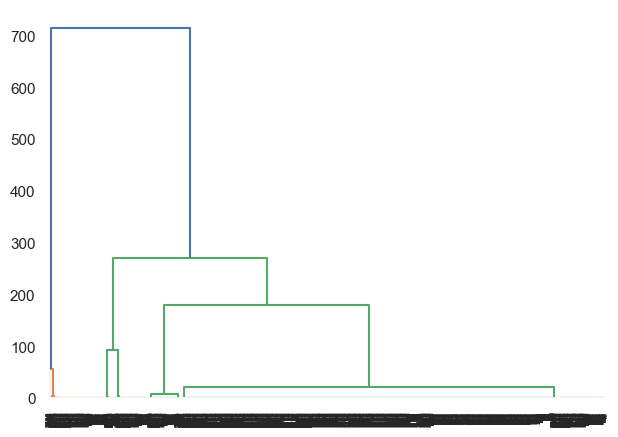

In [115]:
dataset = df_accidents.sample(3000)
df_accidents_prep2_dataset = dataset.iloc[:, [1, 4]].values
dendrogram = sch.dendrogram(sch.linkage(df_accidents_prep2_dataset, method='ward'))

### Observaciones
Asi como tambien se observo en el diagrama generado por la ley del codo, este dendrograma tambien nos especifica la existencia de dos clusters dentro de los datos.

In [116]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(df_accidents_prep2_dataset)
labels = model.labels_

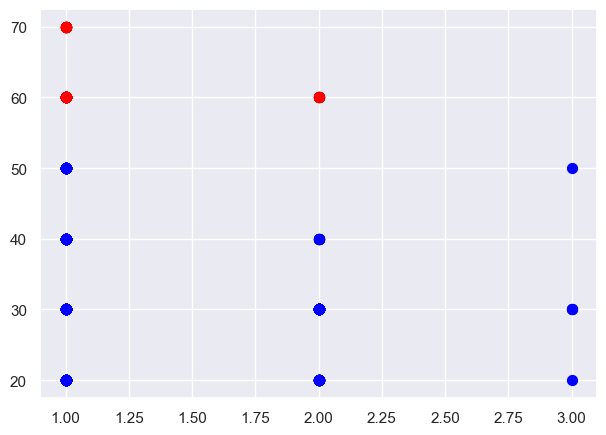

In [117]:
plt.scatter(df_accidents_prep2_dataset[labels==0, 0], df_accidents_prep2_dataset[labels==0, 1], s=50, marker='o', color='blue')
plt.scatter(df_accidents_prep2_dataset[labels==1, 0], df_accidents_prep2_dataset[labels==1, 1], s=50, marker='o', color='red')
plt.show()

### Observaciones
Como es evidente la representación de los datos por medio de este algoritmo no se diferencia en gran medida al generado por k-means, son notables los dos diferentes clusters con variabilidad alta en el sentido de la variable "speed_limit" y una gran tendencia a uno en el eje representativo de "Number_of_Casualties".

### Ahora que tenemos la informacion obtenida de los clusters usando las variables numericas, procedemos a realizar el clustering con las variables categoricas por medio de un algoritmo llamado KModes.

In [118]:
# importing necessary libraries
%pip install kmodes
from kmodes.kmodes import KModes

Note: you may need to restart the kernel to use updated packages.


In [74]:
# Hacemos la preparacion de los datos para el algoritmo de k-modes, reemplazando las variables categoricas por numeros
df_accidents_prep4 = df_accidents[categorical_variables]
df_accidents_prep4 = df_accidents_prep4.replace({'Time': {'Mañana': 0, 'Tarde': 1, 'Noche': 2, 'Madrugada': 3}})
df_accidents_prep4 = df_accidents_prep4.replace({'Day_of_Week': {'Día laboral': 0, 'Fin de semana': 1, 'Desconocido': 2}})
df_accidents_prep4 = df_accidents_prep4.replace({'Vehicle_Type': {'bike': 0}})

# Creamos 3 copias del dataframe para realizar la prueba de kmodes en base a 3 diferentes numeros de clusters
df_accidents_prep4_2 = df_accidents_prep4.copy()
df_accidents_prep4_3 = df_accidents_prep4.copy()
df_accidents_prep4_4 = df_accidents_prep4.copy()


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 258, cost: 14528.0


<AxesSubplot:>

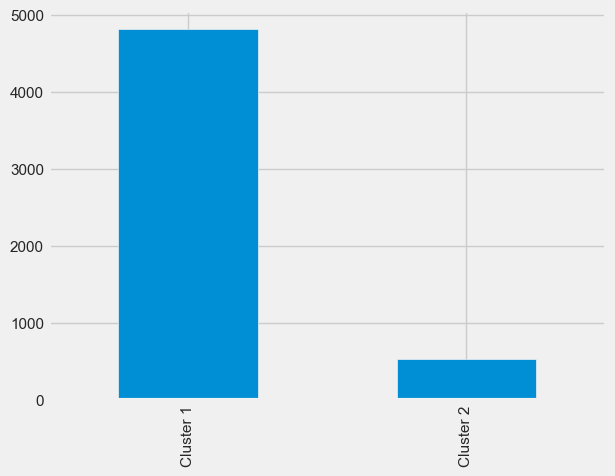

In [75]:
# Aplicamos el algoritmo KModes
km = KModes(n_clusters=2, n_init=5, verbose=1)
fitClusters = km.fit_predict(df_accidents_prep4)

# Graficamos el resultado
df_accidents_prep4['Cluster'] = fitClusters
df_accidents_prep4['Cluster'] = df_accidents_prep4['Cluster'].replace({0: 'Cluster 1', 1: 'Cluster 2'})
df_accidents_prep4['Cluster'].value_counts().plot(kind='bar')


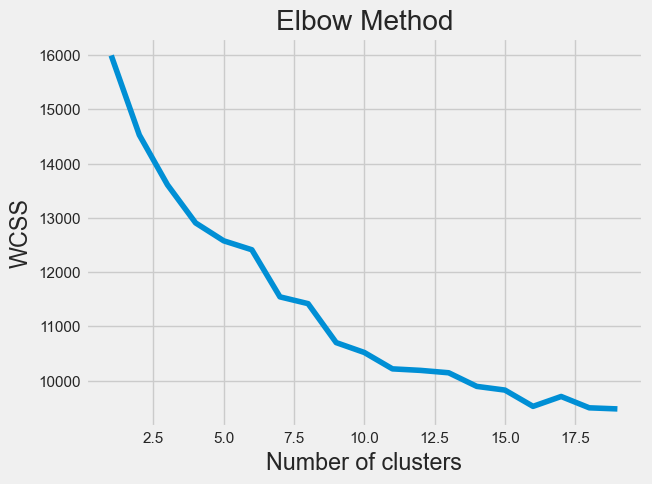

In [76]:
# Realizamos el metodo del codo para determinar el numero de clusters
wcss = []
for i in range(1, 20):
    d = KModes(n_clusters = i, n_init = 10, verbose=0)
    d.fit_predict(df_accidents_prep4)
    wcss.append(d.cost_)

plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 998, cost: 12081.0


<AxesSubplot:>

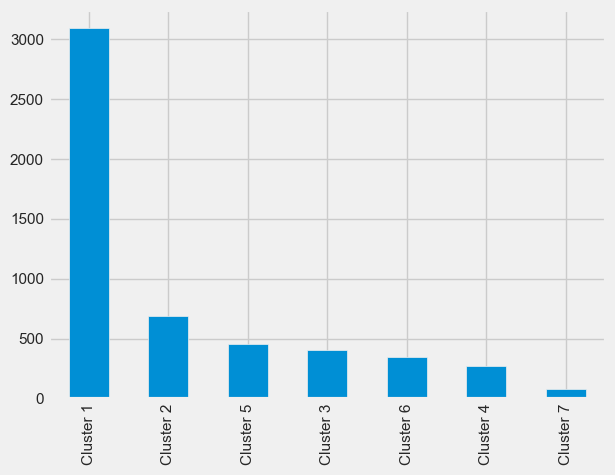

In [84]:
# Aplicamos el algoritmo KModes
km4 = KModes(n_clusters=7, n_init=5, verbose=1)
fitClusters4 = km4.fit_predict(df_accidents_prep4_4)

# Graficamos el resultado
df_accidents_prep4_4['Cluster'] = fitClusters4
df_accidents_prep4_4['Cluster'] = df_accidents_prep4_4['Cluster'].replace({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7'})
df_accidents_prep4_4['Cluster'].value_counts().plot(kind='bar')

In [80]:
# Revisamos los patrones que existen en los clusters para asi realizar su respectiva interpretacion

# Cluster 1
print(df_accidents_prep4_4[df_accidents_prep4['Cluster'] == 'Cluster 1'].describe())

# Cluster 2
print(df_accidents_prep4_4[df_accidents_prep4['Cluster'] == 'Cluster 2'].describe())

# Cluster 3
print(df_accidents_prep4_4[df_accidents_prep4['Cluster'] == 'Cluster 3'].describe())

# Cluster 4
print(df_accidents_prep4_4[df_accidents_prep4['Cluster'] == 'Cluster 4'].describe())

# Cluster 5
print(df_accidents_prep4_4[df_accidents_prep4['Cluster'] == 'Cluster 5'].describe())

# Cluster 6
print(df_accidents_prep4_4[df_accidents_prep4['Cluster'] == 'Cluster 6'].describe())

# Cluster 7
print(df_accidents_prep4_4[df_accidents_prep4['Cluster'] == 'Cluster 7'].describe())

       Accident_Severity  Day_of_Week    Road_Type  Junction_Detail  \
count        4810.000000  4810.000000  4810.000000      4810.000000   
mean            2.682744     0.241372     5.598960         1.869231   
std             0.497836     0.436618     1.406058         2.479139   
min             1.000000     0.000000     1.000000        -1.000000   
25%             2.000000     0.000000     6.000000         0.000000   
50%             3.000000     0.000000     6.000000         0.000000   
75%             3.000000     0.000000     6.000000         3.000000   
max             3.000000     2.000000     9.000000         9.000000   

       Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
count       4810.000000         4810.000000              4810.000000   
mean           1.683784            1.508732                 1.141164   
std            1.424909            1.746585                 0.540163   
min            1.000000            1.000000                -1.000000   


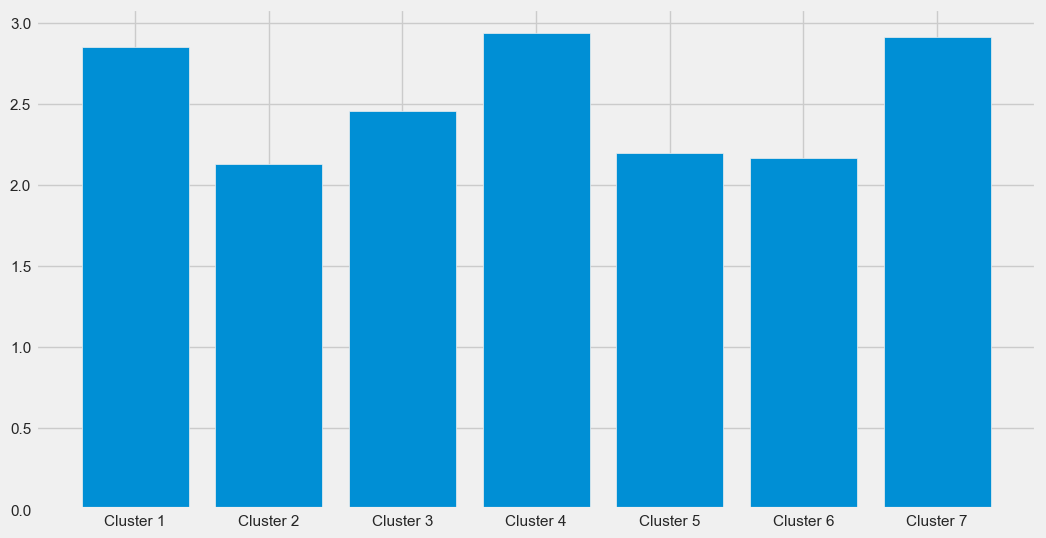

In [82]:
# Graficamos el promedio de severidad en los accidentes de los resultados de los clusters

# Cluster 1
cluster1_mean = df_accidents_prep4_4[df_accidents_prep4_4['Cluster'] == 'Cluster 1']['Accident_Severity'].mean()

# Cluster 2
cluster2_mean = df_accidents_prep4_4[df_accidents_prep4_4['Cluster'] == 'Cluster 2']['Accident_Severity'].mean()

# Cluster 3
cluster3_mean = df_accidents_prep4_4[df_accidents_prep4_4['Cluster'] == 'Cluster 3']['Accident_Severity'].mean()

# Cluster 4
cluster4_mean = df_accidents_prep4_4[df_accidents_prep4_4['Cluster'] == 'Cluster 4']['Accident_Severity'].mean()

# Cluster 5
cluster5_mean = df_accidents_prep4_4[df_accidents_prep4_4['Cluster'] == 'Cluster 5']['Accident_Severity'].mean()

# Cluster 6
cluster6_mean = df_accidents_prep4_4[df_accidents_prep4_4['Cluster'] == 'Cluster 6']['Accident_Severity'].mean()

# Cluster 7
cluster7_mean = df_accidents_prep4_4[df_accidents_prep4_4['Cluster'] == 'Cluster 7']['Accident_Severity'].mean()

# Graficamos el promedio de severidad en los accidentes de los resultados de los clusters
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7']
severity = [cluster1_mean, cluster2_mean, cluster3_mean, cluster4_mean, cluster5_mean, cluster6_mean, cluster7_mean]
ax.bar(clusters,severity)
plt.show()


In [103]:
# Graficamos la media de los atributos que se encuentran en los clusters y tienen una severidad menor o igual a 2

def meanAttributes(df, cluster, attribute):
    return df[df[cluster] == attribute][df['Accident_Severity'] <= 2].mean()

def graphMeanAttributes(df):
    meanVehicle = df['Vehicle_Type'].mean()
    meanWeather = df['Weather_Conditions'].mean()
    meanRoad = df['Road_Surface_Conditions'].mean()
    meanLight = df['Light_Conditions'].mean()
    meanSeverity = df['Accident_Severity'].mean()
    meanPolice = df['Did_Police_Officer_Attend_Scene_of_Accident'].mean()
    meanTime = df['Time'].mean()
    meanUrbalOrRural = df['Urban_or_Rural_Area'].mean()
    meanDay = df['Day_of_Week'].mean()
    meanJunction = df['Junction_Detail'].mean()

    fig = plt.figure(figsize=(15, 7))
    ax = fig.add_axes([0,0,1,1])
    attributes = ['Vehicle_Type', 'Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions', 'Accident_Severity', 'Did_Police_Officer_Attend', 'Time', 'Urban_or_Rural_Area', 'Day_of_Week', 'Junction_Detail']
    mean = [meanVehicle, meanWeather, meanRoad, meanLight,  meanSeverity, meanPolice, meanTime, meanUrbalOrRural, meanDay, meanJunction]
    ax.bar(attributes,mean)
    plt.show()
    

# Cluster 1
cluster1_mean = meanAttributes(df_accidents_prep4_4, 'Cluster', 'Cluster 1')

# Cluster 2
cluster2_mean = meanAttributes(df_accidents_prep4_4, 'Cluster', 'Cluster 2')

# Cluster 3
cluster3_mean = meanAttributes(df_accidents_prep4_4, 'Cluster', 'Cluster 3')

# Cluster 4
cluster4_mean = meanAttributes(df_accidents_prep4_4, 'Cluster', 'Cluster 4')

# Cluster 5
cluster5_mean = meanAttributes(df_accidents_prep4_4, 'Cluster', 'Cluster 5')

# Cluster 6
cluster6_mean = meanAttributes(df_accidents_prep4_4, 'Cluster', 'Cluster 6')

# Cluster 7
cluster7_mean = meanAttributes(df_accidents_prep4_4, 'Cluster', 'Cluster 7')


C:\Users\dania\AppData\Local\Temp\ipykernel_8300\1616636982.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df[cluster] == attribute][df['Accident_Severity'] <= 2].mean()
C:\Users\dania\AppData\Local\Temp\ipykernel_8300\1616636982.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df[df[cluster] == attribute][df['Accident_Severity'] <= 2].mean()


In [111]:
# Df to csv
df_accidents_prep4_4.to_csv('df_accidents_prep4_4.csv')

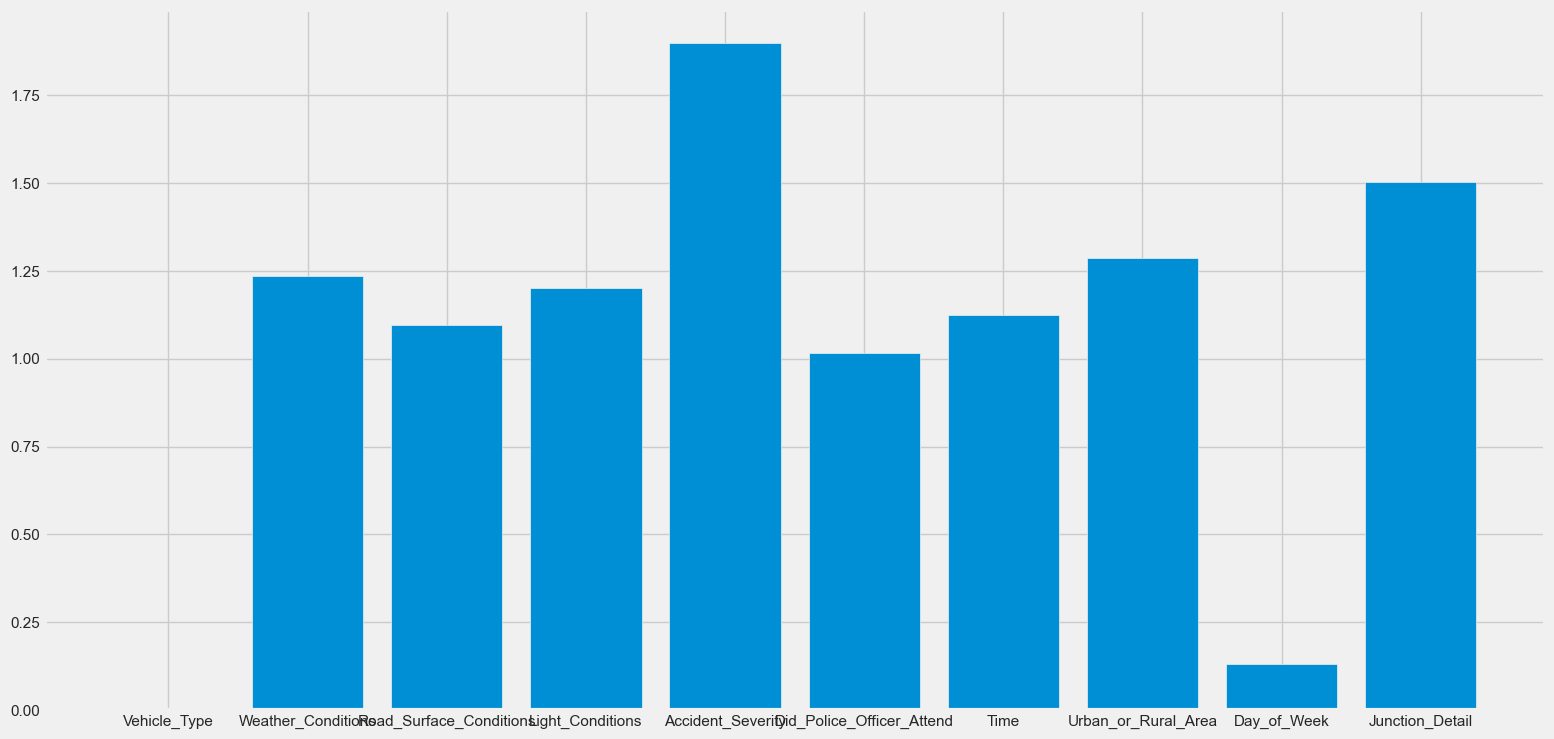

In [104]:
# Graficamos la media de los atributos que se encuentran en los clusters y tienen una severidad mayor a 2
graphMeanAttributes(cluster1_mean)

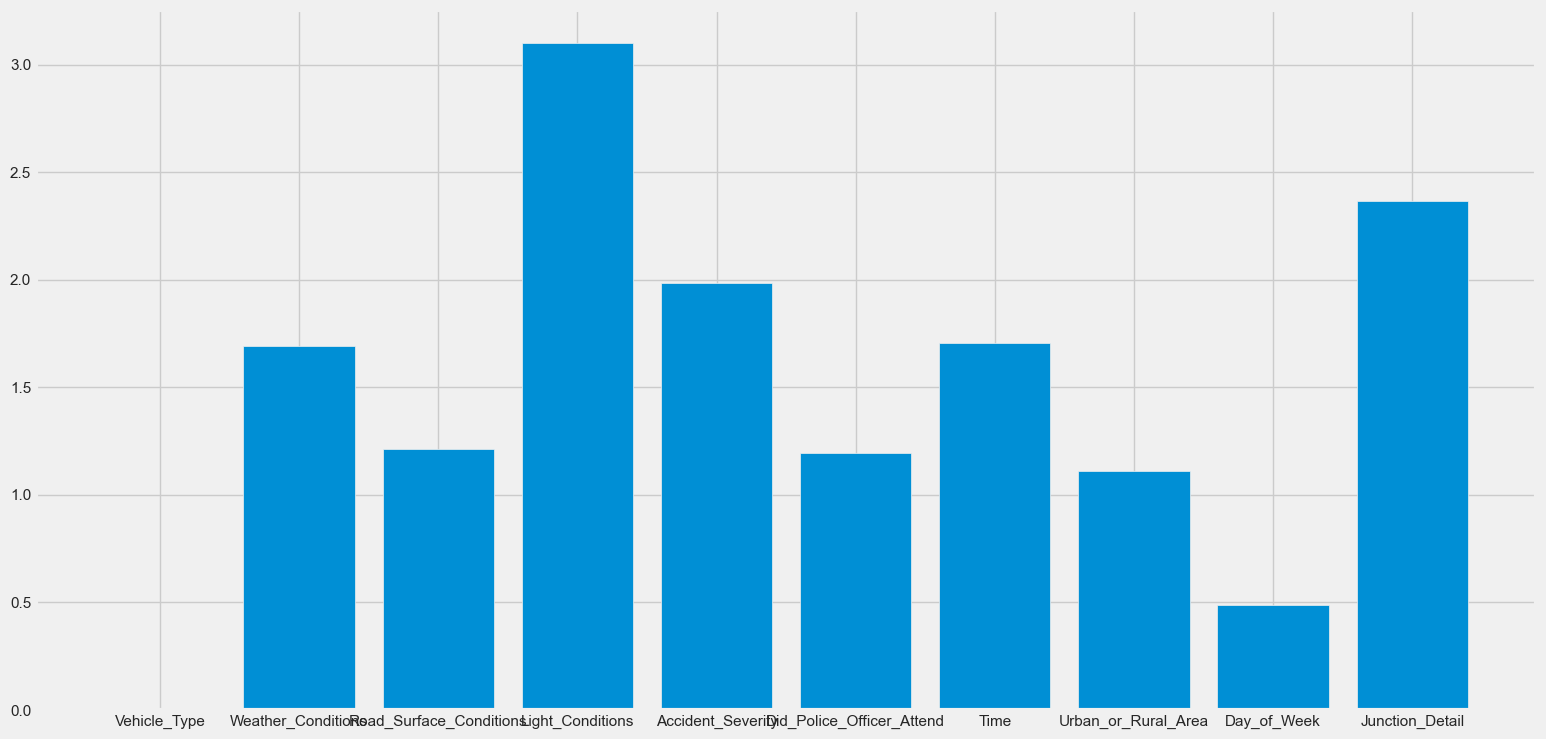

In [105]:
# Cluster 2
graphMeanAttributes(cluster2_mean)

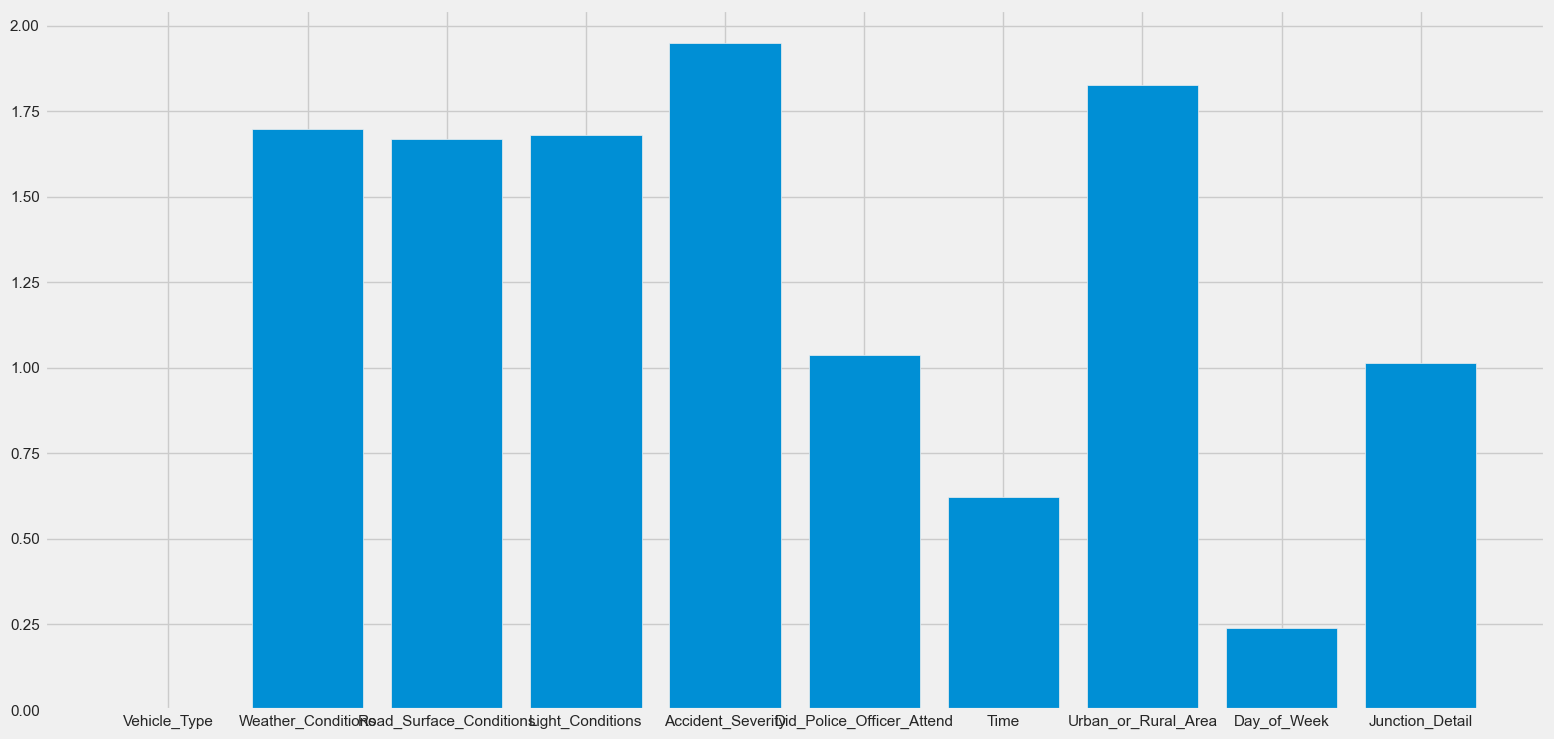

In [106]:
#Cluster 3
graphMeanAttributes(cluster3_mean)

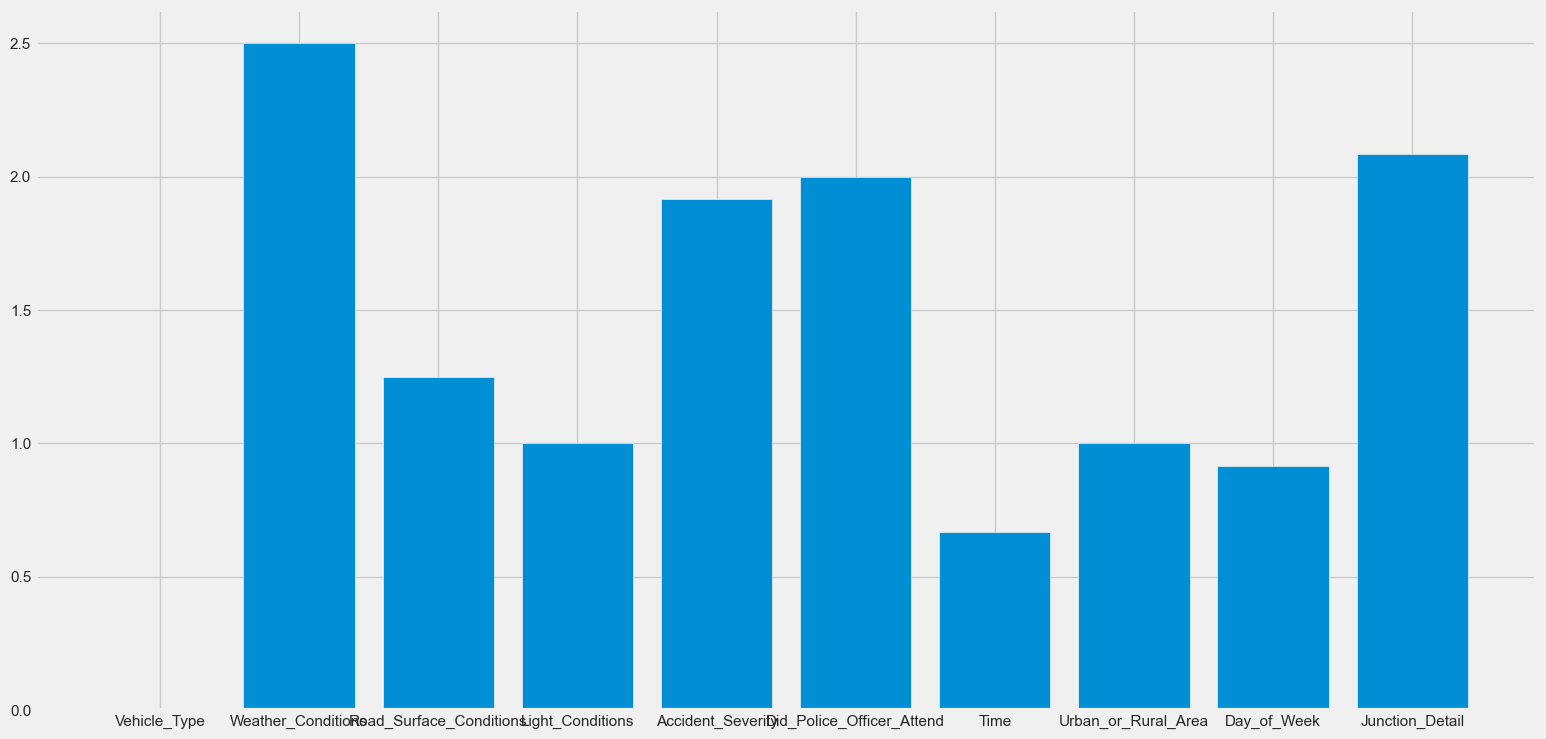

In [107]:
# Cluster 4
graphMeanAttributes(cluster4_mean)

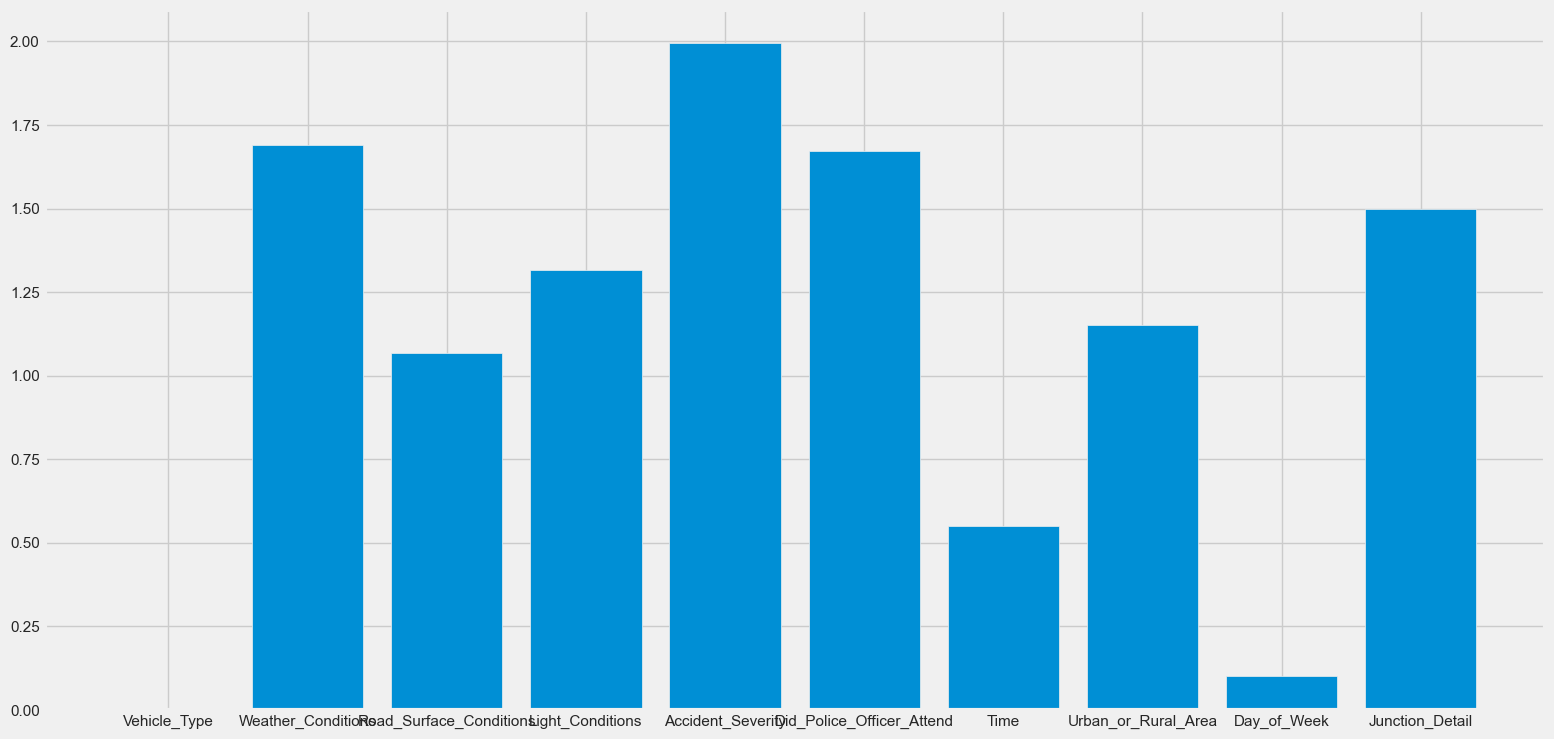

In [108]:
# Cluster 5
graphMeanAttributes(cluster5_mean)

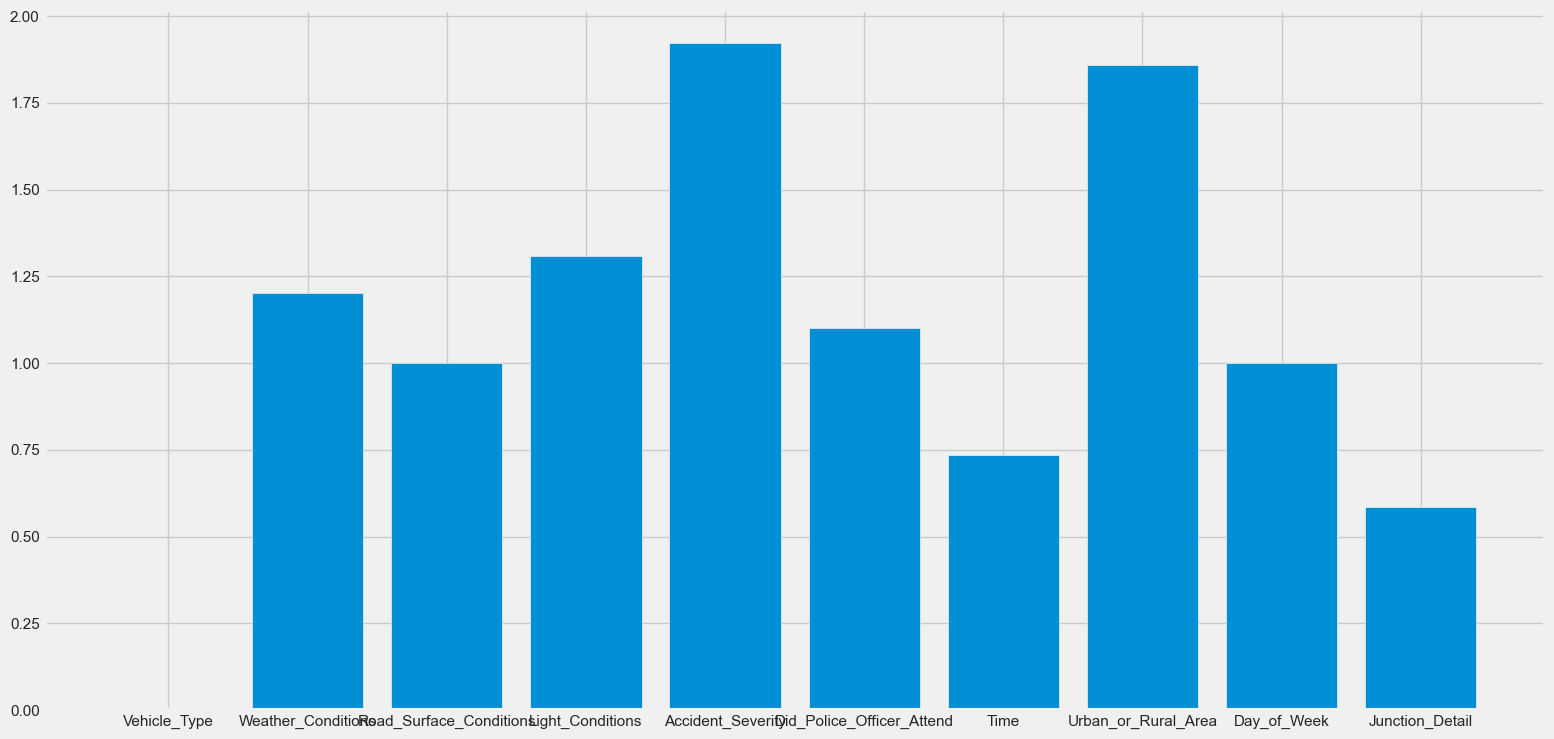

In [109]:
# Cluster 6
graphMeanAttributes(cluster6_mean)

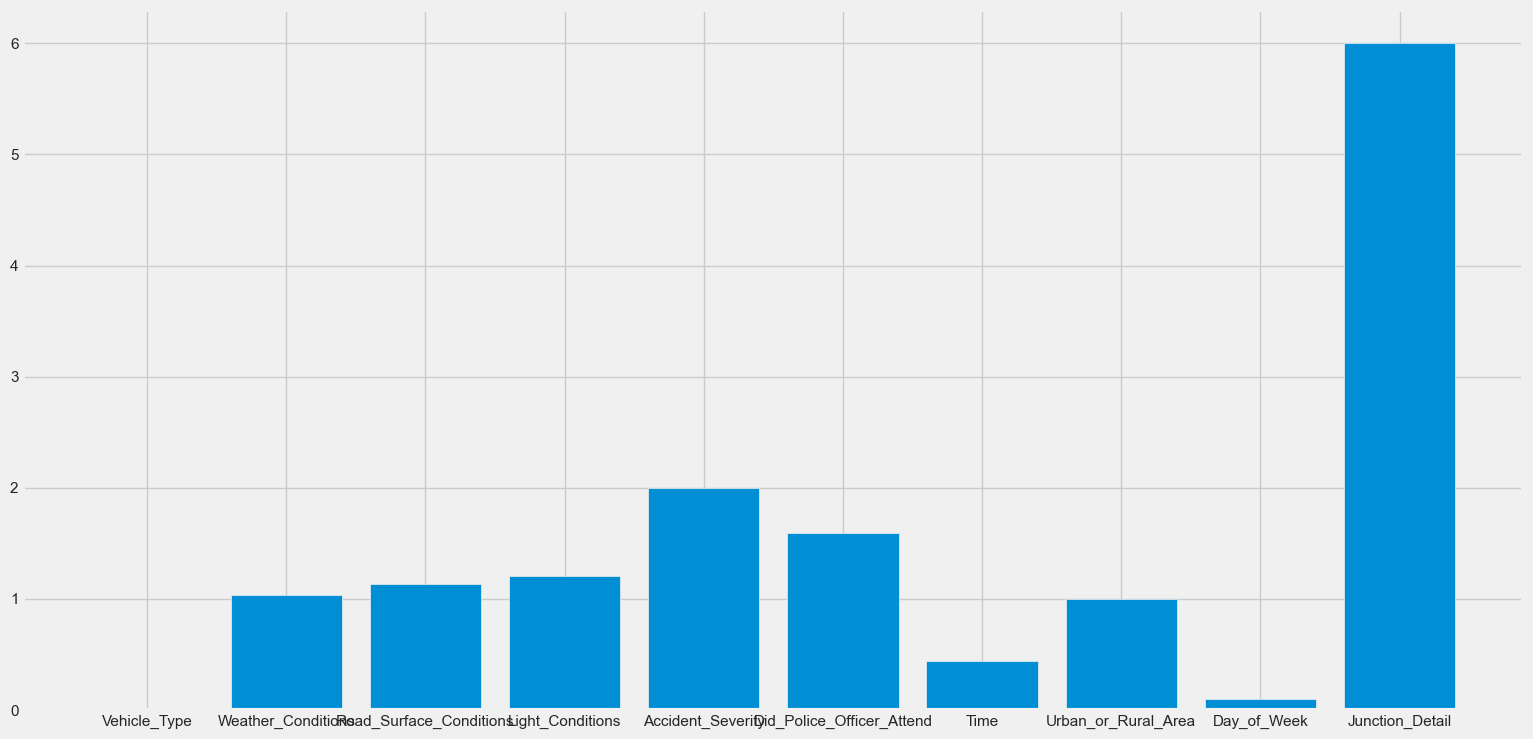

In [110]:
# Cluster 7
graphMeanAttributes(cluster7_mean)

De la informacion analizada con ayuda de los algoritmos de clustering, podemos de forma general que en el Cluster 1 se encuentran una mayor cantidad de registros de accidentes. Adicionalmente, podemos evaluar en base a esto cuales fueron los factores que influyeron en la ocurrencia de los accidentes, y mas que esto, cuales fueron los factores que influyeron en la severidad de los accidentes, teniendo en cuenta la media de estos y la cantidad de accidentes que se presentaron. Concluyendo de esta forma los siguientes puntos:

* Para Junction Detail, tenemos que tiene una gran influencia en la severidad de los accidentes cuando se presenta en una rotonda o minirrotonda
* Para Weather Conditions, tenemos que tiene una gran influencia en la severidad de los accidentes cuando se presentan vientos suaves
* Para Road Surface Conditions, tenemos que tiene una gran influencia en la severidad de los accidentes cuando se presentan condiciones secas
* Para Light Conditions, tenemos que tiene una gran influencia en la severidad de los accidentes cuando se presentan condiciones de luz diurna
* Para Urban_or_Rural_Area, tenemos que tiene una gran influencia en la severidad de los accidentes cuando se presentan en zonas urbanas
* Para Did_Police_Officer_Attend_Scene_of_Accident, tenemos que tiene una gran influencia en la severidad de los accidentes cuando se presentan en accidentes donde si se presento un oficial de policia
* Para Day_of_Week, tenemos que tiene una gran influencia en la severidad de los accidentes cuando se presentan en los dias laborales
* Para Time, tenemos que tiene una gran influencia en la severidad de los accidentes cuando se presentan en la tarde
